In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [418]:
data = pd.read_csv("Iris.csv")

In [419]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [420]:
data = data.drop("Id", axis =1)

In [421]:
array = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

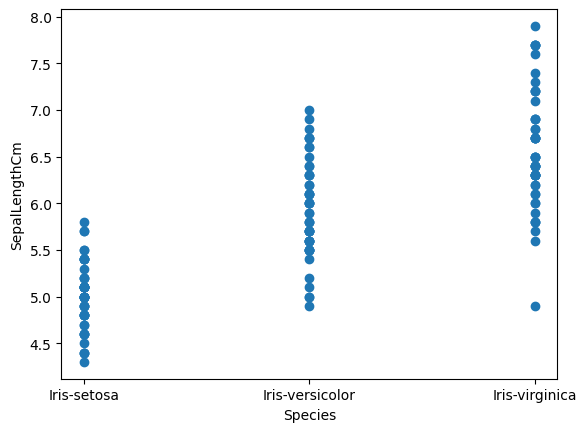

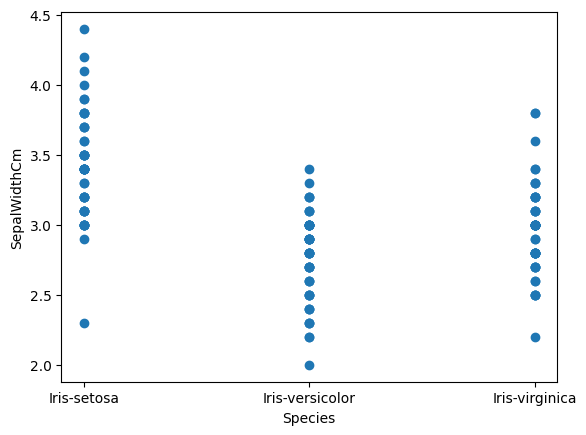

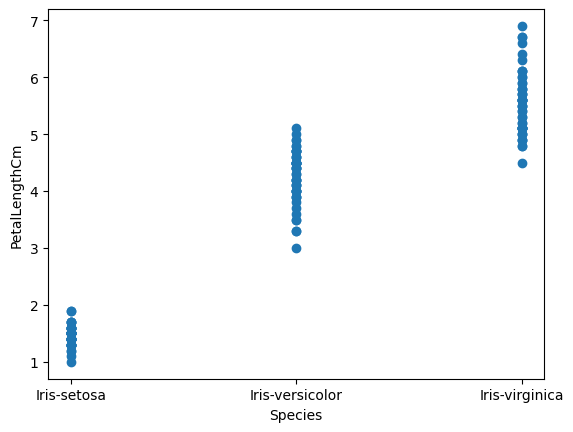

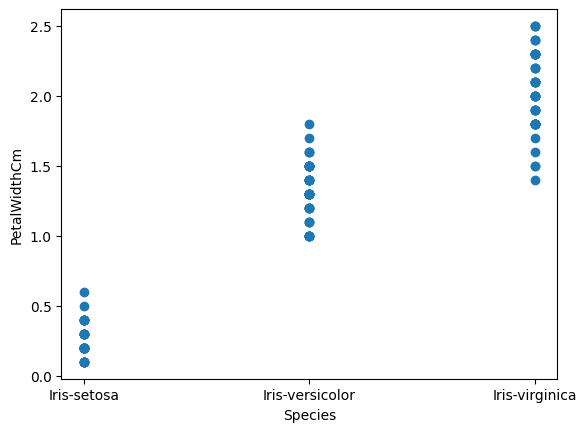

In [422]:
for i in range(0,4):
    plt.scatter(x = data["Species"], y = data[array[i]])
    plt.xlabel("Species")
    plt.ylabel(array[i])
    plt.show()

### CONFUSION MATRIX

<Axes: >

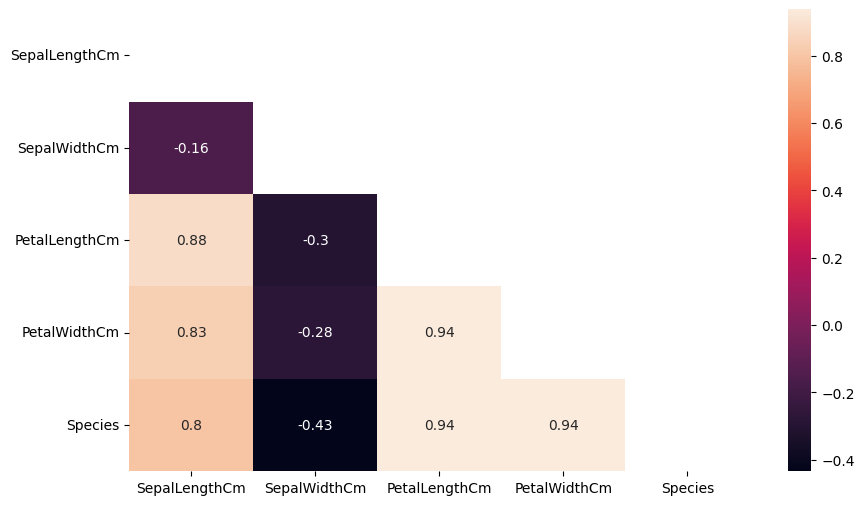

In [423]:
df = data.copy() # copying original data to a data frame in order to not to encode original data.
encoder = LabelEncoder()
df["Species"] = encoder.fit_transform(df["Species"]) # encoding target variable
matrix = df.corr(method='spearman')
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize = (10, 6))
sns.heatmap(matrix, annot = True, mask = mask)

### DETECTING ANOMALIES

In [424]:
list = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in list:
    Q1 = np.percentile(data[i], 25)
    Q3 = np.percentile(data[i], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.25 * IQR
    lower = Q1 - 1.25 * IQR
    anomaly = (data[i] >= upper) | (data[i] <= lower)
    print("Anomaly points in", i, "\n")
    print(np.where(anomaly), "\n")
    print("Value of anomaly point is:", data[i][anomaly], "\n")
    # data.drop(data.index[anomaly], axis = 0, inplace = True) 
    print("New shape of data after remowing outliers:", np.shape(data))
    print("**************")

Anomaly points in SepalLengthCm 

(array([], dtype=int64),) 

Value of anomaly point is: Series([], Name: SepalLengthCm, dtype: float64) 

New shape of data after remowing outliers: (150, 5)
**************
Anomaly points in SepalWidthCm 

(array([14, 15, 32, 33, 60], dtype=int64),) 

Value of anomaly point is: 14    4.0
15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64 

New shape of data after remowing outliers: (150, 5)
**************
Anomaly points in PetalLengthCm 

(array([], dtype=int64),) 

Value of anomaly point is: Series([], Name: PetalLengthCm, dtype: float64) 

New shape of data after remowing outliers: (150, 5)
**************
Anomaly points in PetalWidthCm 

(array([], dtype=int64),) 

Value of anomaly point is: Series([], Name: PetalWidthCm, dtype: float64) 

New shape of data after remowing outliers: (150, 5)
**************


In [425]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # creating data frame for indepent variables
y = data['Species'] # creating data frame for target variable

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [427]:
model_list = {"GradientBoostingClassifier" : GradientBoostingClassifier(), "RandomForestClassifier" : RandomForestClassifier(), "DecisionTreeClassifier" : DecisionTreeClassifier(), "KNeighborsClassifier": KNeighborsClassifier()}

In [428]:
for i in model_list:
    print("Model:", i, "\n")
    model = model_list[i]
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test, predictions), "\n")

Model: GradientBoostingClassifier 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30
 

Model: RandomForestClassifier 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30
 

Model: DecisionTreeClassifier 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.